In [1]:
#LOAD REQUIRED LIBRARIES
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization

In [2]:
#DATA AUGMENTATION
trainDataGen = ImageDataGenerator(rotation_range = 5,width_shift_range = 0.1,height_shift_range = 0.1,rescale = 1.0/255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = False,fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255) ##normalization
trainGenerator = trainDataGen.flow_from_directory(r"C:\Users\ancha\Desktop\deep learning 6th sem mini project\dataset\DevanagariHandwrittenCharacterDataset\Train",target_size = (32,32),batch_size = 32,color_mode = "grayscale",class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(r"C:\Users\ancha\Desktop\deep learning 6th sem mini project\dataset\DevanagariHandwrittenCharacterDataset\Test",target_size=(32,32),batch_size=32,color_mode = "grayscale",class_mode= 'categorical')


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [3]:
#CONVOLUTIONAL NEURAL NETWORK

model = Sequential()

####################################################################################################################
#Layer1
model.add(Convolution2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu",input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2),padding="same"))

####################################################################################################################
#Layer2
model.add(Convolution2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu",input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2),padding="same"))

#####################################################################################################################
#Layers 3
model.add(Convolution2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2),padding="same"))

#####################################################################################################################
#Layer 4
model.add(Convolution2D(filters = 64,kernel_size = (3,3),strides= 1,activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2),padding="same"))
model.add(Flatten())

In [4]:
#FULLY CONNECTED LAYERS                 

#####################################################################################
#Fully Connected Layer 1
model.add(Dense(128,activation = "relu",kernel_initializer = "uniform"))
model.add(BatchNormalization())

#####################################################################################
#Fully Connected Layer 2
model.add(Dense(64,activation = "relu",kernel_initializer = "uniform"))
model.add(BatchNormalization())

#####################################################################################
#Fully Connected Layer 3
model.add(Dense(46,activation = "softmax",kernel_initializer = "uniform"))

#Compile Model
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                        

In [5]:
#Fit model on the loaded dataset
res=model.fit(trainGenerator,epochs = 40,steps_per_epoch = 2444,validation_data = validation_generator,validation_steps = 432)


Epoch 1/40
2444/2444 [==============================] - 320s 130ms/step - loss: 0.8025 - accuracy: 0.7763 - val_loss: 0.1920 - val_accuracy: 0.9417
Epoch 2/40
2444/2444 [==============================] - 301s 123ms/step - loss: 0.3035 - accuracy: 0.9053 - val_loss: 0.1783 - val_accuracy: 0.9411
Epoch 3/40
2444/2444 [==============================] - 308s 126ms/step - loss: 0.2387 - accuracy: 0.9265 - val_loss: 0.1484 - val_accuracy: 0.9543
Epoch 4/40
2444/2444 [==============================] - 331s 136ms/step - loss: 0.1999 - accuracy: 0.9372 - val_loss: 0.0944 - val_accuracy: 0.9701
Epoch 5/40
2444/2444 [==============================] - 294s 120ms/step - loss: 0.1788 - accuracy: 0.9442 - val_loss: 0.0816 - val_accuracy: 0.9748
Epoch 6/40
2444/2444 [==============================] - 291s 119ms/step - loss: 0.1628 - accuracy: 0.9499 - val_loss: 0.1528 - val_accuracy: 0.9495
Epoch 7/40
2444/2444 [==============================] - 327s 134ms/step - loss: 0.1523 - accuracy: 0.9522 - val_

In [7]:
print("LOSS: ",loss)
print("ACCURACY: ",accuracy)

LOSS:  0.036006104201078415
ACCURACY:  0.9901449084281921


In [32]:
#MODEL EVALUATION
loss, accuracy = model.evaluate(trainGenerator, verbose=1)
loss_v, accuracy_v = model.evaluate(validation_generator, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

print(model.summary())


432/432 [==============================] - 59s 136ms/step - loss: 0.0360 - accuracy: 0.9901
Validation: accuracy = 0.990145  ;  loss_v = 0.036006
Test: accuracy = 0.985895  ;  loss = 0.045371
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                              

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                        

In [9]:
model.save("HindiModel2.h5")

In [10]:
########################################################
# TESTING #
########################################################
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2

In [11]:
''' ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
labels =['yna', 't`aa', 't`haa', 'd`aa', 'd`haa', 'a`dna', 'ta', 'tha', 'da', 'dha', 'ka', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'kha', 'sha', 'shat', 'sa', 'ha', 'aksha', 'tra', 'gya', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
'''
labels = [u'\u091E',u'\u091F',u'\u0920',u'\u0921',u'\u0922',u'\u0923',u'\u0924',u'\u0925',u'\u0926',u'\u0927',u'\u0915',u'\u0928',u'\u092A',u'\u092B',u'\u092c',u'\u092d',u'\u092e',u'\u092f',u'\u0930',u'\u0932',u'\u0935',u'\u0916',u'\u0936',u'\u0937',u'\u0938',u'\u0939','ksha','tra','gya',u'\u0917',u'\u0918',u'\u0919',u'\u091a',u'\u091b',u'\u091c',u'\u091d',u'\u0966',u'\u0967',u'\u0968',u'\u0969',u'\u096a',u'\u096b',u'\u096c',u'\u096d',u'\u096e',u'\u096f']


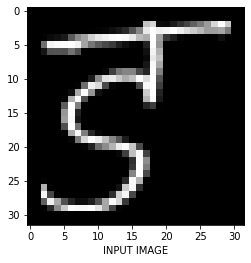

In [27]:
#INPUT IMAGE
import numpy as np
from keras.preprocessing import image
test_image = cv2.imread(r"C:\Users\ancha\Desktop\deep learning 6th sem mini project\dataset\DevanagariHandwrittenCharacterDataset\Test\character_13_daa\493.png")
x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
plt.plot(x)
plt.xlabel("INPUT IMAGE")
plt.imshow(test_image)


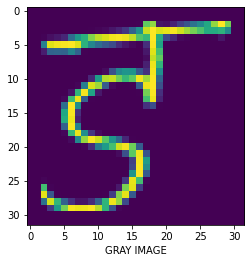

In [28]:
gray=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)

x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])

plt.plot(x)

plt.xlabel("GRAY IMAGE")

plt.imshow(gray)

[INFO] loading network...
The letter is  ड


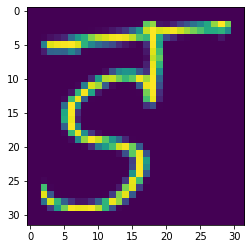

In [29]:
import numpy as np
from keras.preprocessing import image
test_image = cv2.imread(r"C:\Users\ancha\Desktop\deep learning 6th sem mini project\dataset\DevanagariHandwrittenCharacterDataset\Test\character_13_daa\493.png")

image = cv2.resize(test_image,(32,32))

image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# show the output image
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=3)
print("[INFO] loading network...")
import tensorflow as tf
model = tf.keras.models.load_model(r"C:\Users\ancha\Desktop\deep learning 6th sem mini project\HindiModel2.h5")
lists = model.predict(image)[0]
print("The letter is ",labels[np.argmax(lists)])
res=labels[np.argmax(lists)]

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY))##optional


In [16]:
# This module is imported to play an audio message
import os
from gtts import gTTS

myobj = gTTS(text="इनपुट छवि से पता चला डेटा स्क्रीन में दिखाया गया है", lang='hi', slow=False)
#myobj = gTTS(res, lang='hi', slow=False)

# Playing the converted file
os.system("start welcome.mp3")

#################################################################################################
#################################################################################################
#################################################################################################


0